In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import seaborn as sns
import gzip

In [3]:
train = pd.read_csv("./preprocesses/train_dict_onehot.csv")
test = pd.read_csv("./preprocesses/test_dict_onehot.csv")
submission = pd.read_fwf('inputs/sample_submit.txt')

In [4]:
preX = train[train['LABEL']==0].sample(n=len(train[train['LABEL']==1]),random_state = 2022)

In [5]:
preX = pd.concat([preX, train[train['LABEL']==1]]).sample(frac=1)

In [6]:
preY = preX['LABEL']
test_uid = test['CUST_UID']
preX.drop(columns=['LABEL','CUST_UID'],inplace=True)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

preX_train, preX_test, preY_train, preY_test = train_test_split(preX, preY, test_size=0.20, stratify=preY, random_state=1)

In [8]:
# Grid Search，建立100棵樹來取得最佳參數
params = {"criterion":["gini", "entropy"], "max_depth":range(1,20)}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='roc_auc', cv=100, verbose=1, n_jobs=-1)
grid_search.fit(preX_train, preY_train)
grid_search.best_score_, grid_search.best_estimator_, grid_search.best_params_

Fitting 100 folds for each of 38 candidates, totalling 3800 fits


(0.9307234375,
 DecisionTreeClassifier(max_depth=5),
 {'criterion': 'gini', 'max_depth': 5})

In [9]:
tree = grid_search.best_estimator_
tree.fit(preX,preY)
feature_importances = pd.DataFrame(tree.feature_importances_)
feature_importances.index = preX_train.columns
feature_importances = feature_importances.sort_values(0,ascending=False)
feature_importances

,0
Numerical_31,0.832064
Numerical_30,0.100968
Numerical_29,0.025366
Numerical_1,0.011604
Numerical_34,0.008363
Numerical_32,0.005599
Numerical_6,0.005029
Categorical_3_2.0,0.003688
Numerical_2,0.002430
Numerical_38,0.001680


In [10]:
# 取重要性前1/2的特征
preX_train = preX_train[feature_importances.index[:int(len(feature_importances)/2)]]
preX_test = preX_test[feature_importances.index[:int(len(feature_importances)/2)]]

In [11]:
# 使用前50％的重要特征重新进行Grid Search
params = {"criterion":["gini", "entropy"], "max_depth":range(5,7)}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='roc_auc', cv=100, verbose=1, n_jobs=-1)
grid_search.fit(preX_train, preY_train)
grid_search.best_score_, grid_search.best_estimator_, grid_search.best_params_

Fitting 100 folds for each of 4 candidates, totalling 400 fits


(0.9316093750000001,
 DecisionTreeClassifier(max_depth=5),
 {'criterion': 'gini', 'max_depth': 5})

In [12]:
# 取前1/2的特征
preX = preX[feature_importances.index[:int(len(feature_importances)/2)]]
# 依据cv结果建模并拟合
tree = grid_search.best_estimator_
tree.fit(preX,preY)

feature_importances = pd.DataFrame(tree.feature_importances_)
feature_importances.index = preX_train.columns
feature_importances = feature_importances.sort_values(0,ascending=False)
feature_importances

,0
Numerical_31,0.832064
Numerical_30,0.100968
Numerical_29,0.025366
Numerical_1,0.011604
Numerical_34,0.008363
Numerical_32,0.005599
Numerical_6,0.005029
Categorical_3_2.0,0.003688
Numerical_2,0.002430
Numerical_38,0.001680


In [13]:
# 再删除特征，只取>0.005的特征来建模
feature_len = len(feature_importances[feature_importances[feature_importances.columns[0]] > 0.002])

y = train[['LABEL']]
X = train[feature_importances[:feature_len].index]
test = test[feature_importances[:feature_len].index]

[22:03:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Roc_auc_score:  99.09 %


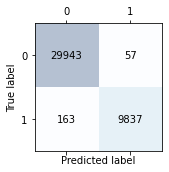

In [14]:

from xgboost import XGBClassifier

# 使用xgboost 建模，指定先前参数得到的节点深度限制使用xgboost 建模，指定先前调参得到的节点深度限制
model = XGBClassifier(tree_method = 'gpu_hist', n_jobs=-1, n_estimators=500, max_depth=6,use_label_encoder=False)
model.fit(X,y.values.ravel())
y_pred = model.predict(X)
print("Roc_auc_score: ",roc_auc_score(y,y_pred)*100,"%")

# 输出 confusion matrix
confmat = confusion_matrix(y_true=y, y_pred=y_pred, labels=[0, 1])

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [16]:
test_predict = model.predict_proba(test)[:,1]

In [30]:
test['CUST_UID']=test_uid
test['predict'] = test_predict

In [25]:
# pd.Series(prediction_train.sort_index().values).to_csv("preprocesses/train_cut_xgboost.csv", index=False)
pd.Series(test_predict).to_csv("preprocesses/test_cut_xgboost.csv", index=False)
test[['CUST_UID', 'predict']].to_csv("result/submission_cut_xgboost.txt", index=False, sep=' ', header=None,float_format='%.10f')
test[['CUST_UID', 'predict']].to_csv("result/temp.csv", index=False)


In [31]:
test[['CUST_UID', 'predict']].to_csv("result/submission_cut_xgboost1.txt", index=False, sep=' ', header=None,float_format='{:f}'.format, encoding='utf-8')